# PCA

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch

from model.pca import PCA

plt.style.use("seaborn-darkgrid")

# Data

## Sample data

In [2]:
x_dim = 3
z_dim = 2
n_dim_org = 300

x = torch.rand(n_dim_org, x_dim) * 2 - 1
x[:, 2] *= 0
x = x[x[:, 0] ** 2 + x[:, 1] ** 2 < 1]

# Save data size
n_dim = x.size(0)

## Rotation

In [3]:
def r_z(theta):
    if not isinstance(theta, torch.Tensor):
        theta = torch.tensor([theta])

    r = torch.tensor([
        [1, 0, 0],
        [0, torch.cos(theta)[0], -torch.sin(theta)[0]],
        [0, torch.sin(theta)[0], torch.cos(theta)[0]]
    ])
    return r

def r_y(theta):
    if not isinstance(theta, torch.Tensor):
        theta = torch.tensor([theta])

    r = torch.tensor([
        [torch.cos(theta)[0], 0, torch.sin(theta)[0]],
        [0, 1, 0],
        [-torch.sin(theta)[0], 0, torch.cos(theta)[0]]
    ])
    return r

In [4]:
x = x @ r_z(2.) @ r_y(-0.1)

## Plot

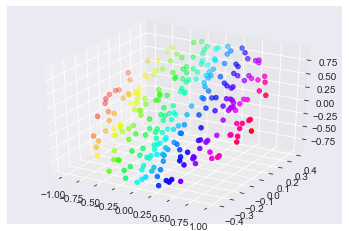

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x.numpy()[:, 0], x.numpy()[:, 1], zs=x.numpy()[:, 2],
           c=x.numpy()[:, 0], cmap=plt.get_cmap("hsv"))
plt.show()

# Model

In [6]:
pca = PCA(x_dim, z_dim, n_dim)

In [7]:
pca.inference({"x": x}, max_iter=30)

In [8]:
sample = pca.sample({"x": x})

# Plot

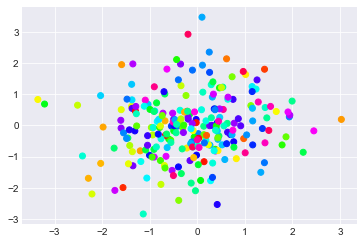

In [9]:
data = sample["z"]

plt.figure()
plt.scatter(data.numpy()[:, 0], data.numpy()[:, 1],
            c=x.numpy()[:, 0], cmap=plt.get_cmap("hsv"))
plt.show()

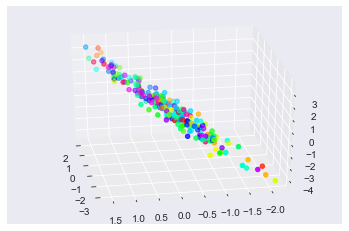

In [27]:
data = sample["x"]

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data.numpy()[:, 0], data.numpy()[:, 1], zs=data.numpy()[:, 2],
           c=x.numpy()[:, 0], cmap=plt.get_cmap("hsv"))
ax.view_init(azim=170)
plt.show()